In [1]:
import pandas as pd


df = pd.read_csv("KaggleV2-May-2016.csv")

# Preview data
print(df.head())


# Preview data
print(df.head())
# Rename columns
df.columns = df.columns.str.lower().str.replace('-', '_')

# Drop irrelevant columns
df.drop(columns=['patientid', 'appointmentid'], inplace=True)

# Convert dates
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Create feature: waiting days
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Target column
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})  # 1 = no-show

# Weekday
df['weekday'] = df['appointmentday'].dt.day_name()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

Accuracy: 0.7992852619198407
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


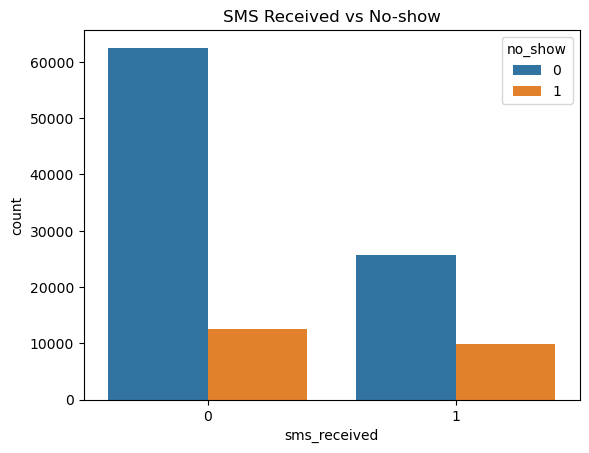

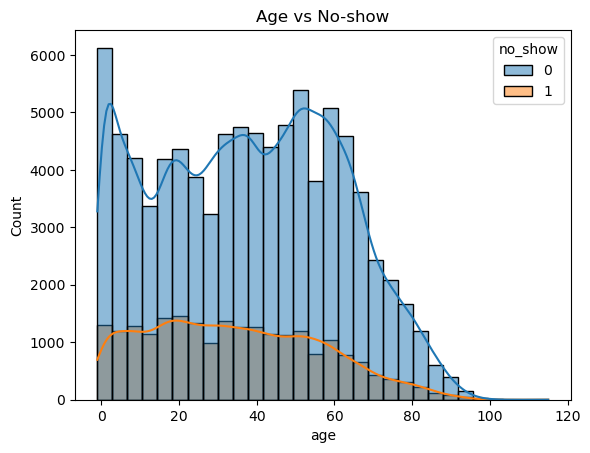

In [2]:
from sklearn.metrics import classification_report, accuracy_score

# Select features
features = ['age', 'scholarship', 'hipertension', 'diabetes', 'alcoholism',
            'sms_received', 'waiting_days']
X = df[features]
y = df['no_show']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

# SMS vs no-show
sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title("SMS Received vs No-show")
plt.show()

# Age distribution
sns.histplot(data=df, x='age', hue='no_show', bins=30, kde=True)
plt.title("Age vs No-show")
plt.show()

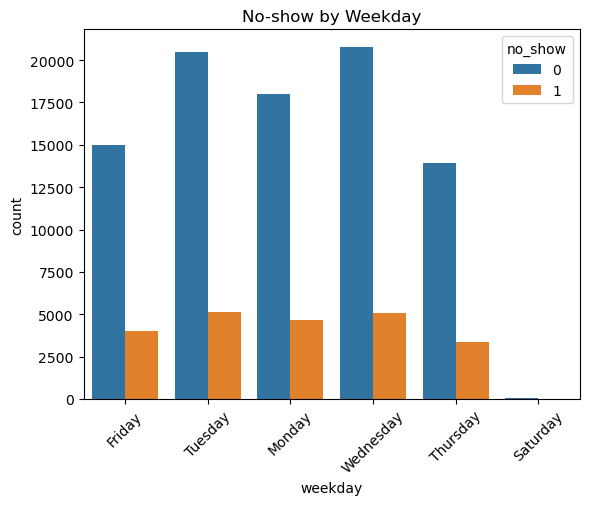

In [3]:
sns.countplot(x='weekday', hue='no_show', data=df)
plt.title("No-show by Weekday")
plt.xticks(rotation=45)
plt.show()